# YouTube Video Performance Predictor & Audience Insights System

## About Dataset:

The dataset includes YouTube video performance data gathered from multiple files:

* `Aggregated_Metrics_By_Video.csv`: Video-level engagement and performance metrics.
* `Aggregated_Metrics_By_Country_And_Subscriber_Status.csv`: Viewership split by geography and subscription status.
* `Video_Performance_Over_Time.csv`: Daily trends of views, watch time, etc.
* `All_Comments_Final.csv`: User comments and feedback from videos.

This data helps evaluate how videos perform, how audiences engage, and what factors drive video success on the platform.

## Project Overview:

Objective: Build a comprehensive **YouTube Performance & Audience Insights Dashboard** using Machine Learning and Power BI.

## Focus Areas:

* Performance Prediction:
  Use regression models to predict video views based on key metrics (watch time, CTR, engagement).

* Audience Segmentation:
  Analyze viewer behavior based on country, subscription status, and engagement patterns.

* Sentiment Analysis:
  Use NLP tools to classify YouTube comments as positive, neutral, or negative to understand audience feedback.

* Time-Based Trends:
  Identify viewership trends across dates, weekdays, and months to determine best posting times.

* Interactive Dashboard (Power BI):
  Present KPIs, trends, audience breakdowns, and sentiment analysis with filters and visuals to support content strategy decisions.


## PHASE 1: EDA & Feature Engineering

### Step 1.1: Import Libraries and Load Data

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()

'C:\\Users\\ksvg7\\Desktop\\Capstone_Projects\\YouTube Video Performance Predictor & Audience Insights System'

In [91]:
# Load dataset
video_df = pd.read_csv(r"C:\Users\ksvg7\Desktop\Capstone_Projects\YouTube Video Performance Predictor & Audience Insights System\Original YouTube data\Aggregated_Metrics_By_Video.csv")

In [92]:
# To view dataset First 5 rows
video_df.head()

,Video,Video title,Video publish date,Comments,Shares,DisLikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average Percentage viewed(%),Average view Duration,Views,Watch time (hours),Subscribers,Your Estmated Revenue (USD),Impressions,Impressionss click-through rate (%)
0,shsyg79bjbkki,pubg,29-Aug-20,14197,39640,3902,225021,4570,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,8-May-20,907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,12-Nov-20,412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,1300,6.113,188318,0.72
3,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,16-Jul-20,402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,1189,202.963,442334,2.53
4,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,29-Aug-20,375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,11917,155.779,521185,4.01


### Step1.2:Understand the Data

In [94]:
# To view dataset shape
print(video_df.shape)

(224, 19)


In [95]:
# To View dataset columns
print(video_df.columns)

Index(['Video', 'Video title', 'Video publish date', 'Comments', 'Shares',
       'DisLikes', 'Likes', 'Subscribers lost', 'Subscribers gained',
       'RPM (USD)', 'CPM (USD)', 'Average Percentage viewed(%)',
       'Average view Duration', 'Views', 'Watch time (hours)', 'Subscribers',
       'Your Estmated Revenue (USD)', 'Impressions',
       'Impressionss click-through rate (%)'],
      dtype='object')


In [96]:
# To view dataset information
print(video_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Video                                224 non-null    object 
 1   Video title                          224 non-null    object 
 2   Video publish date                   224 non-null    object 
 3   Comments                             224 non-null    int64  
 4   Shares                               224 non-null    int64  
 5   DisLikes                             224 non-null    int64  
 6   Likes                                224 non-null    int64  
 7   Subscribers lost                     224 non-null    int64  
 8   Subscribers gained                   224 non-null    int64  
 9   RPM (USD)                            224 non-null    float64
 10  CPM (USD)                            222 non-null    float64
 11  Average Percentage viewed(%)    

In [97]:
video_df.describe(include='all')

,Video,Video title,Video publish date,Comments,Shares,DisLikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average Percentage viewed(%),Average view Duration,Views,Watch time (hours),Subscribers,Your Estmated Revenue (USD),Impressions,Impressionss click-through rate (%)
count,224,224,224,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,224,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
unique,224,224,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158,NaN,NaN,NaN,NaN,NaN,NaN
top,shsyg79bjbkki,pubg,29-Aug-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0:03:50,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,127.321429,353.924107,34.839286,2008.919643,33.602679,1608.084821,4.442040,11.442779,34.087277,NaN,4.971645e+04,2835.711522,1554.517857,259.537433,9.013573e+05,3.084152
std,NaN,NaN,NaN,948.693052,2736.321694,268.668317,15387.274015,306.261265,15628.834115,1.789148,3.334781,15.118746,NaN,3.810302e+05,21662.566897,12656.989186,2011.119492,6.967916e+06,1.670448
min,NaN,NaN,NaN,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,NaN,6.000000e+01,1.068400,4.000000,0.000000,3.650000e+02,0.490000
25%,NaN,NaN,NaN,18.750000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,NaN,3.940000e+03,177.037125,44.750000,12.208250,9.947100e+04,1.925000
50%,NaN,NaN,NaN,37.500000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,NaN,8.347500e+03,397.852200,129.000000,32.595500,1.541925e+05,2.895000
75%,NaN,NaN,NaN,67.500000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,NaN,1.836875e+04,1145.621400,590.250000,96.814750,2.894885e+05,3.975000


In [98]:
# Describe the dataset
video_df.describe()

,Comments,Shares,DisLikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average Percentage viewed(%),Views,Watch time (hours),Subscribers,Your Estmated Revenue (USD),Impressions,Impressionss click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,127.321429,353.924107,34.839286,2008.919643,33.602679,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1554.517857,259.537433,9.013573e+05,3.084152
std,948.693052,2736.321694,268.668317,15387.274015,306.261265,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12656.989186,2011.119492,6.967916e+06,1.670448
min,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,4.000000,0.000000,3.650000e+02,0.490000
25%,18.750000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,44.750000,12.208250,9.947100e+04,1.925000
50%,37.500000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,129.000000,32.595500,1.541925e+05,2.895000
75%,67.500000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,590.250000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,4570.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


In [99]:
video_df.describe(include="object")

,Video,Video title,Video publish date,Average view Duration
count,224,224,224,224
unique,224,224,222,158
top,shsyg79bjbkki,pubg,29-Aug-20,0:03:50
freq,1,1,2,5


### Step 1.2: Data Cleaning

In [101]:
# Check for missing values
print(video_df.isnull().sum())

Video                                  0
Video title                            0
Video publish date                     0
Comments                               0
Shares                                 0
DisLikes                               0
Likes                                  0
Subscribers lost                       0
Subscribers gained                     0
RPM (USD)                              0
CPM (USD)                              2
Average Percentage viewed(%)           0
Average view Duration                  0
Views                                  0
Watch time (hours)                     0
Subscribers                            0
Your Estmated Revenue (USD)            0
Impressions                            0
Impressionss click-through rate (%)    0
dtype: int64


In [102]:
# count the null values  
video_df['CPM (USD)'].isnull().sum()  # Should return 2

2

In [103]:
# Fill with mean
video_df['CPM (USD)'].fillna(video_df['CPM (USD)'].mean(), inplace=True)

In [104]:
# Check again for missing values
print(video_df.isnull().sum())

Video                                  0
Video title                            0
Video publish date                     0
Comments                               0
Shares                                 0
DisLikes                               0
Likes                                  0
Subscribers lost                       0
Subscribers gained                     0
RPM (USD)                              0
CPM (USD)                              0
Average Percentage viewed(%)           0
Average view Duration                  0
Views                                  0
Watch time (hours)                     0
Subscribers                            0
Your Estmated Revenue (USD)            0
Impressions                            0
Impressionss click-through rate (%)    0
dtype: int64


In [105]:
# check the datatypes
video_df.dtypes

Video                                   object
Video title                             object
Video publish date                      object
Comments                                 int64
Shares                                   int64
DisLikes                                 int64
Likes                                    int64
Subscribers lost                         int64
Subscribers gained                       int64
RPM (USD)                              float64
CPM (USD)                              float64
Average Percentage viewed(%)           float64
Average view Duration                   object
Views                                    int64
Watch time (hours)                     float64
Subscribers                              int64
Your Estmated Revenue (USD)            float64
Impressions                              int64
Impressionss click-through rate (%)    float64
dtype: object

In [106]:
# Convert object columns to datetime or numeric types where necessary.

video_df['Video publish date'] = pd.to_datetime(video_df['Video publish date'], errors='coerce')
numeric_columns = ['Views', 'Likes','Comments','DisLikes','Subscribers', 'Shares','Subscribers lost','Subscribers gained','Impressions']
video_df[numeric_columns] = video_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [107]:
print(video_df.columns.tolist())

['Video', 'Video title', 'Video publish date', 'Comments', 'Shares', 'DisLikes', 'Likes', 'Subscribers lost', 'Subscribers gained', 'RPM (USD)', 'CPM (USD)', 'Average Percentage viewed(%)', 'Average view Duration', 'Views', 'Watch time (hours)', 'Subscribers', 'Your Estmated Revenue (USD)', 'Impressions', 'Impressionss click-through rate (%)']


In [108]:
# convert object column to time datatype
video_df['Average view Duration'] = pd.to_timedelta(video_df['Average view Duration'])

In [109]:
# Convert to numeric in case it's string
video_df['Watch time (hours)'] = pd.to_numeric(video_df['Watch time (hours)'], errors='coerce')

# Convert hours to timedelta
video_df['Watch time'] = pd.to_timedelta(video_df['Watch time (hours)'], unit='h')


In [110]:
# we can drop Original column
video_df.drop(columns=['Watch time (hours)'], inplace=True)

In [111]:
# check agian the datatypes
video_df.dtypes

Video                                           object
Video title                                     object
Video publish date                      datetime64[ns]
Comments                                         int64
Shares                                           int64
DisLikes                                         int64
Likes                                            int64
Subscribers lost                                 int64
Subscribers gained                               int64
RPM (USD)                                      float64
CPM (USD)                                      float64
Average Percentage viewed(%)                   float64
Average view Duration                  timedelta64[ns]
Views                                            int64
Subscribers                                      int64
Your Estmated Revenue (USD)                    float64
Impressions                                      int64
Impressionss click-through rate (%)            float64
Watch time

In [112]:
# Remove potential outliers (optional)
video_df = video_df[video_df['Views'] > 0]

In [113]:
video_df.dtypes

Video                                           object
Video title                                     object
Video publish date                      datetime64[ns]
Comments                                         int64
Shares                                           int64
DisLikes                                         int64
Likes                                            int64
Subscribers lost                                 int64
Subscribers gained                               int64
RPM (USD)                                      float64
CPM (USD)                                      float64
Average Percentage viewed(%)                   float64
Average view Duration                  timedelta64[ns]
Views                                            int64
Subscribers                                      int64
Your Estmated Revenue (USD)                    float64
Impressions                                      int64
Impressionss click-through rate (%)            float64
Watch time

In [114]:
video_df['Average view Duration'].unique()

<TimedeltaArray>
['0 days 00:03:25', '0 days 00:03:09', '0 days 00:05:14', '0 days 00:10:21',
 '0 days 00:02:36', '0 days 00:04:37', '0 days 00:05:55', '0 days 00:02:06',
 '0 days 00:03:36', '0 days 00:04:56',
 ...
 '0 days 00:03:14', '0 days 00:01:55', '0 days 00:05:09', '0 days 00:02:04',
 '0 days 00:02:39', '0 days 00:02:13', '0 days 00:02:35', '0 days 00:00:28',
 '0 days 00:01:52', '0 days 00:01:04']
Length: 158, dtype: timedelta64[ns]

In [115]:
video_df[ 'Watch time'].unique()

<TimedeltaArray>
['13233 days 10:21:12.959999902',  '2743 days 18:42:15.119999974',
     '8 days 08:17:47.759999999',      '153 days 15:20:19.320000',
       '89 days 12:18:39.600000',       '43 days 02:23:40.200000',
        '9 days 13:25:31.800000',   '436 days 01:02:48.120000003',
       '50 days 05:49:16.680000',       '12 days 17:36:38.160000',
 ...
        '1 days 12:08:46.680000',        '2 days 15:06:49.680000',
        '5 days 00:22:15.600000',     '6 days 21:30:01.439999999',
        '0 days 09:37:07.680000',        '2 days 08:35:34.800000',
        '0 days 19:16:30.720000',               '0 days 22:32:42',
        '2 days 09:38:10.680000',        '0 days 01:04:06.240000']
Length: 224, dtype: timedelta64[ns]

### Step 1.3: Feature Engineering

In [117]:
video_df['Publish Month'] =video_df['Video publish date'].dt.month
video_df['Publish Day'] = video_df['Video publish date'].dt.day
video_df['Publish Weekday'] = video_df['Video publish date'].dt.day_name()
video_df['Is Weekend'] = video_df['Video publish date'].dt.weekday >= 5  # Saturday = 5, Sunday = 6

In [118]:
# Prevent division by zero with a small constant
video_df['Likes per View'] = video_df['Likes'] / (video_df['Views'] + 1)
video_df['Dislikes per View'] = video_df['DisLikes'] / (video_df['Views'] + 1)
video_df['Comments per View'] = video_df['Comments'] / (video_df['Views'] + 1)
video_df['Shares per View'] = video_df['Shares'] / (video_df['Views'] + 1)
video_df['Subscribers per View'] = video_df['Subscribers'] / (video_df['Views'] + 1)

In [119]:
video_df.isnull().sum()

Video                                  0
Video title                            0
Video publish date                     0
Comments                               0
Shares                                 0
DisLikes                               0
Likes                                  0
Subscribers lost                       0
Subscribers gained                     0
RPM (USD)                              0
CPM (USD)                              0
Average Percentage viewed(%)           0
Average view Duration                  0
Views                                  0
Subscribers                            0
Your Estmated Revenue (USD)            0
Impressions                            0
Impressionss click-through rate (%)    0
Watch time                             0
Publish Month                          0
Publish Day                            0
Publish Weekday                        0
Is Weekend                             0
Likes per View                         0
Dislikes per Vie

### Step 1.4: Exploratory Data Analysis (EDA)

### Univariant Analysis

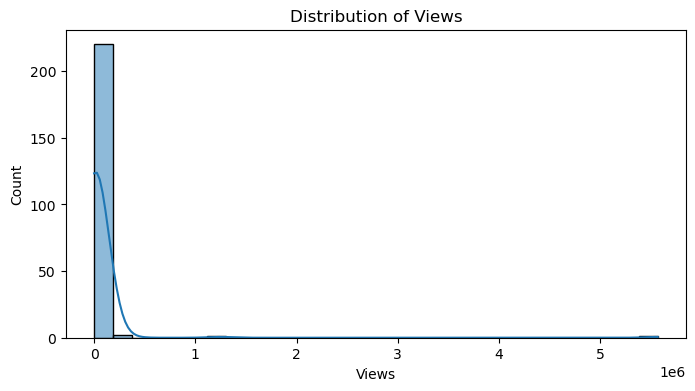

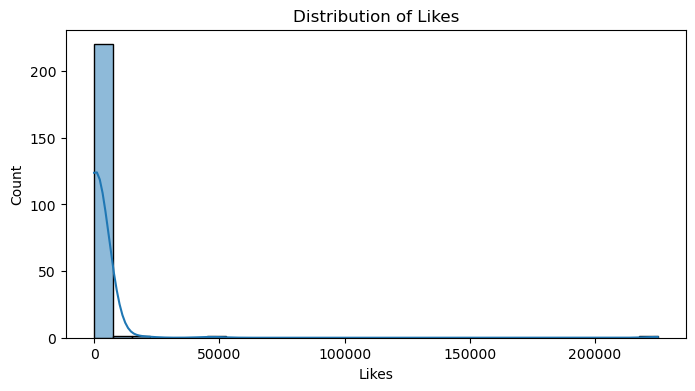

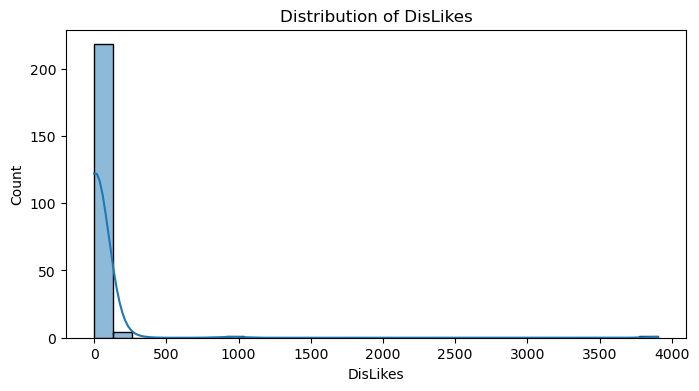

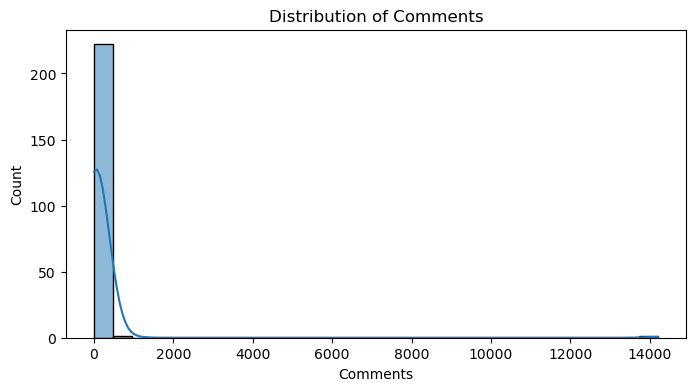

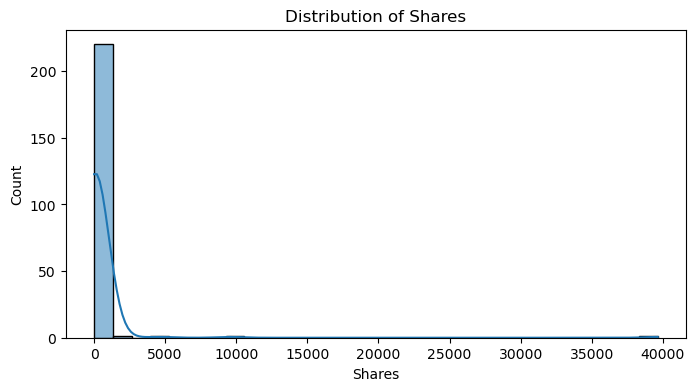

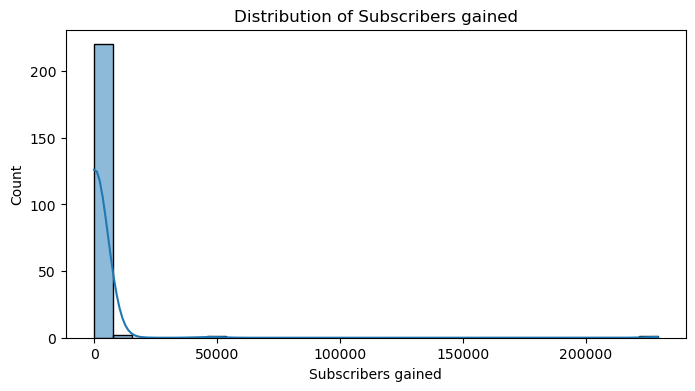

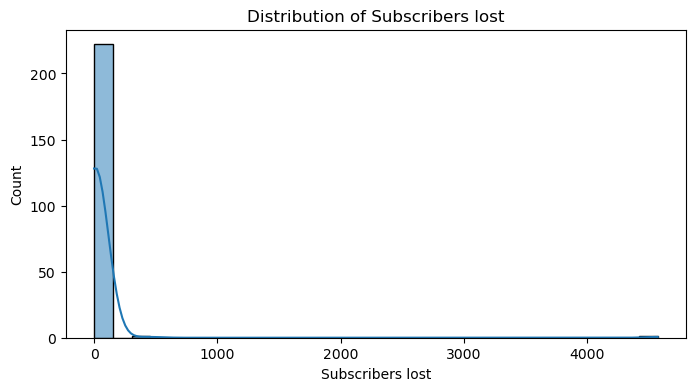

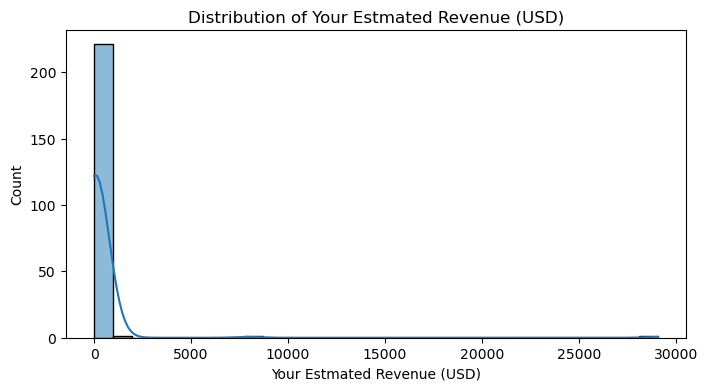

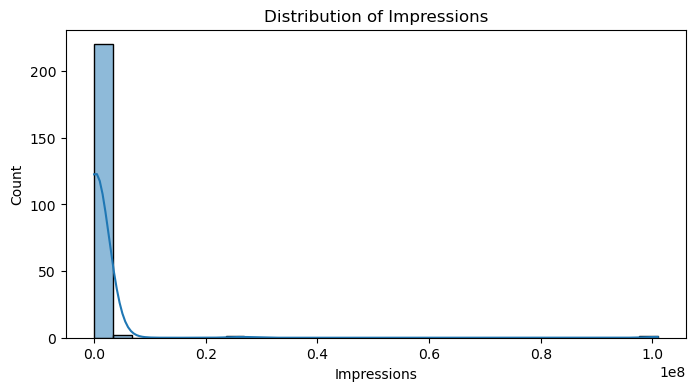

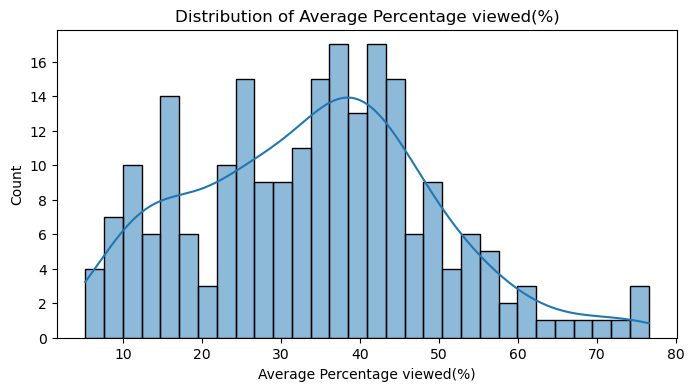

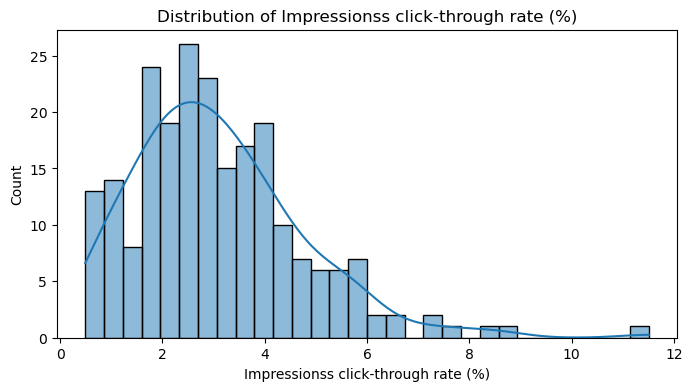

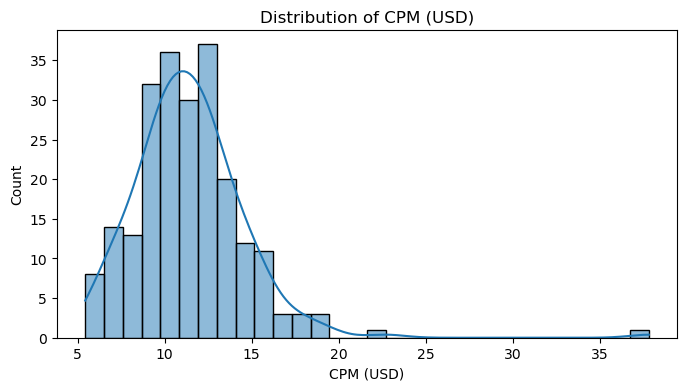

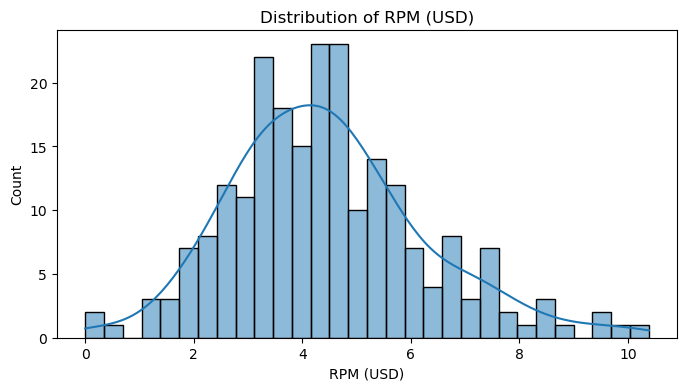

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Views', 'Likes', 'DisLikes', 'Comments', 'Shares',
            'Subscribers gained', 'Subscribers lost', 'Your Estmated Revenue (USD)',
            'Impressions', 'Average Percentage viewed(%)', 'Impressionss click-through rate (%)',
            'CPM (USD)', 'RPM (USD)']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(video_df[col],bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


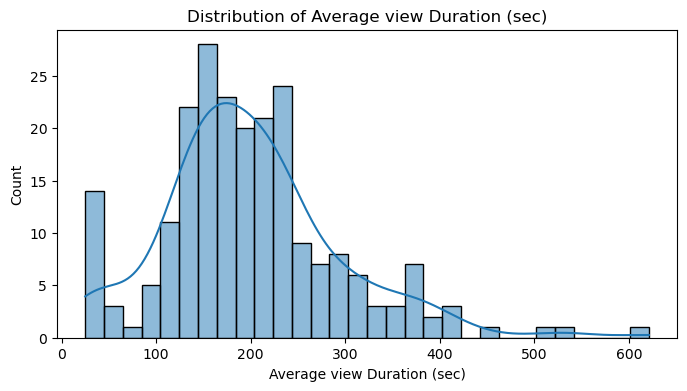

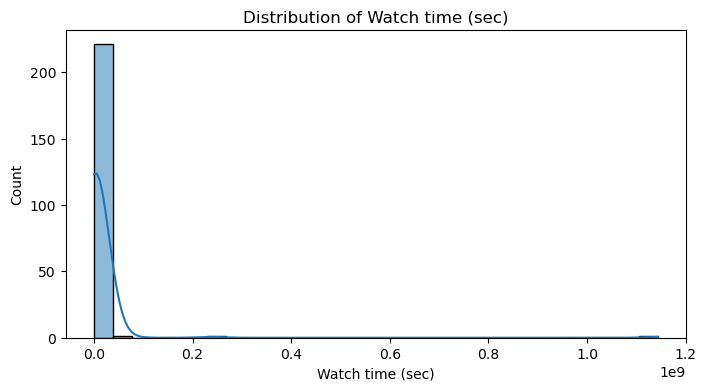

In [123]:
# Convert timedelta columns to seconds or minutes
video_df['Average view Duration (sec)'] = video_df['Average view Duration'].dt.total_seconds()
video_df['Watch time (sec)'] = video_df['Watch time'].dt.total_seconds()

# Now update your num_cols list
num_cols = [ 
    'Average view Duration (sec)', 'Watch time (sec)'
]

# Re-run the plots
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(video_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


### Bivarient Analysis

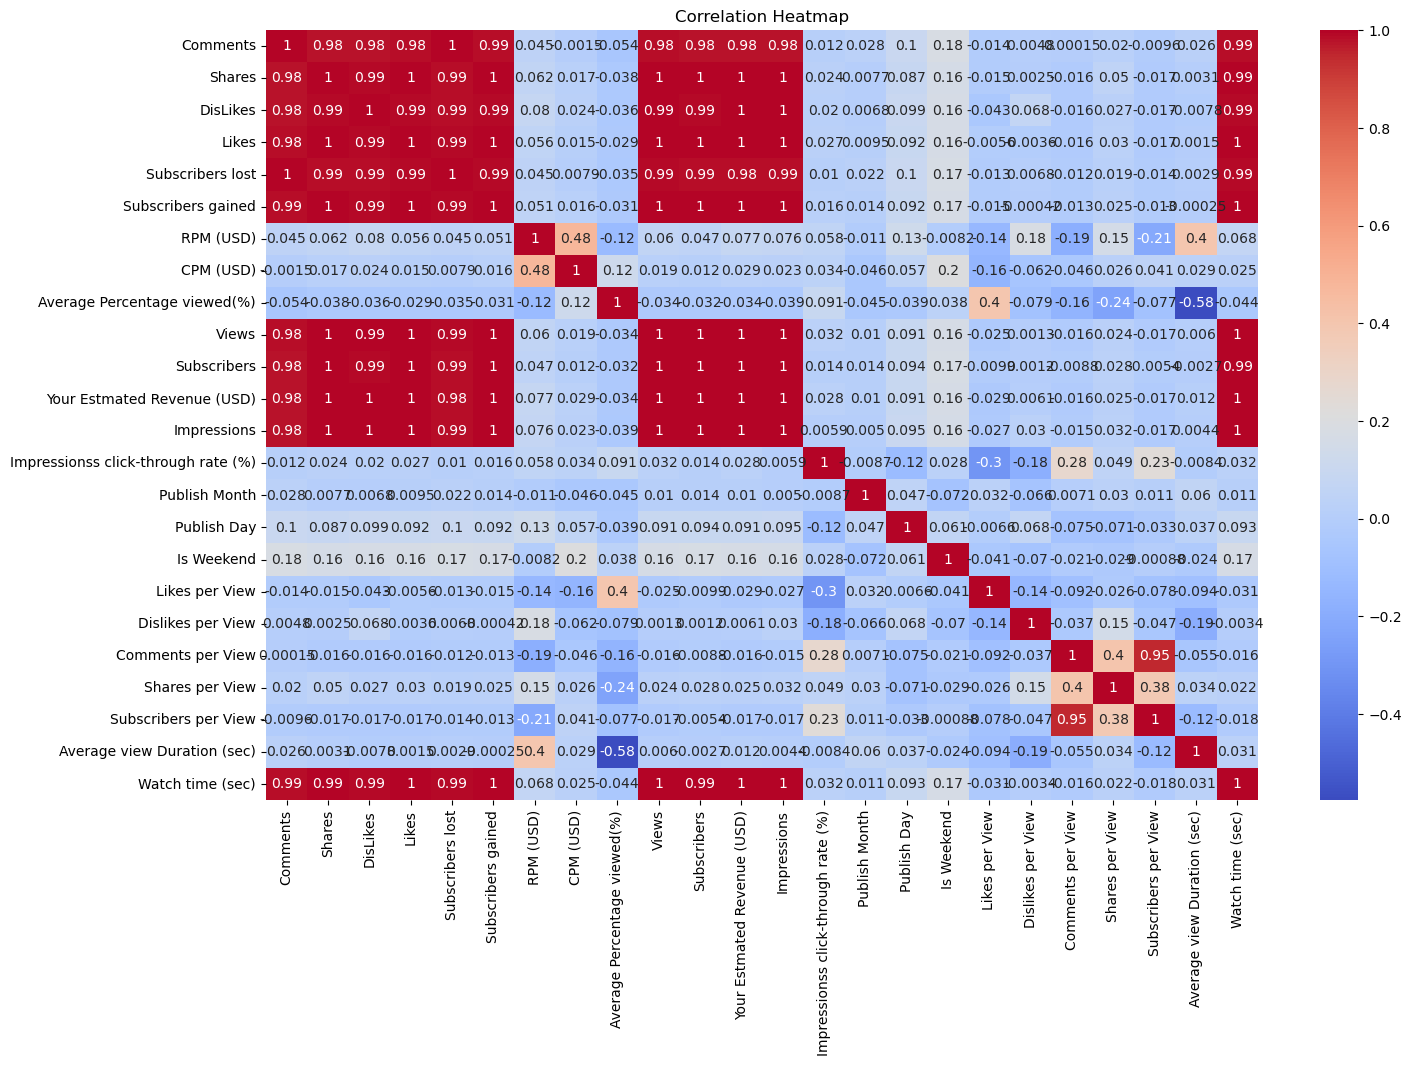

In [125]:
# Correlation Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(video_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Views vs Other Metrics

<Axes: xlabel='Average view Duration', ylabel='Views'>

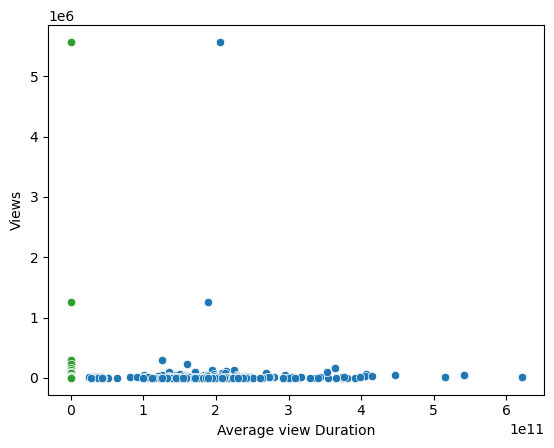

In [127]:
sns.scatterplot(x='Average view Duration', y='Views', data=video_df)
sns.scatterplot(x='Average Percentage viewed(%)', y='Views', data=video_df)
sns.scatterplot(x='Impressionss click-through rate (%)', y='Views', data=video_df)

### Revenue vs Views and Watch Time

<Axes: xlabel='Views', ylabel='Your Estmated Revenue (USD)'>

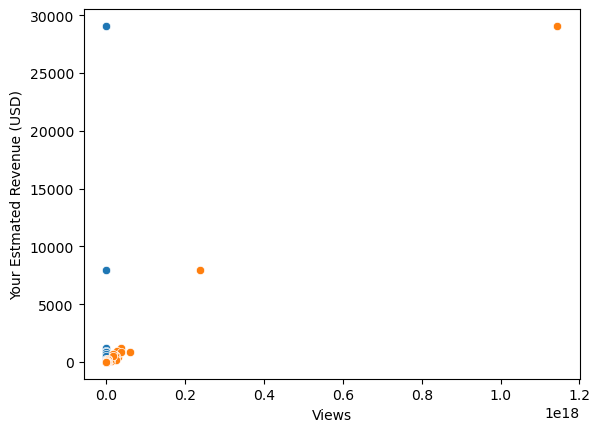

In [129]:
sns.scatterplot(x='Views', y='Your Estmated Revenue (USD)', data=video_df)
sns.scatterplot(x='Watch time', y='Your Estmated Revenue (USD)', data=video_df)

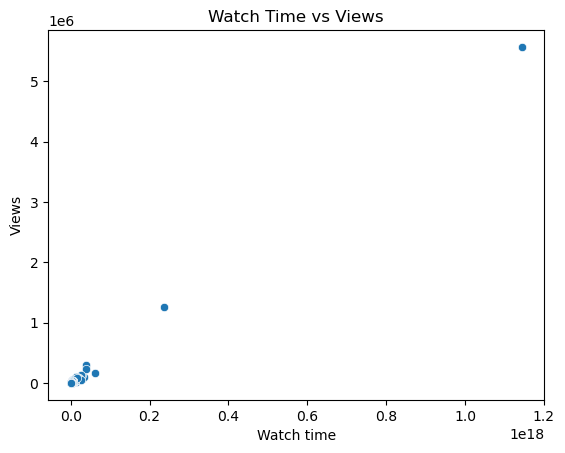

In [130]:
# Scatter: Watch Time vs Views
sns.scatterplot(x='Watch time', y='Views', data=video_df)
plt.title("Watch Time vs Views")
plt.show()


### Time-based Trends
### Monthly or Weekly Publishing Patterns

<Axes: xlabel='Publish Month', ylabel='count'>

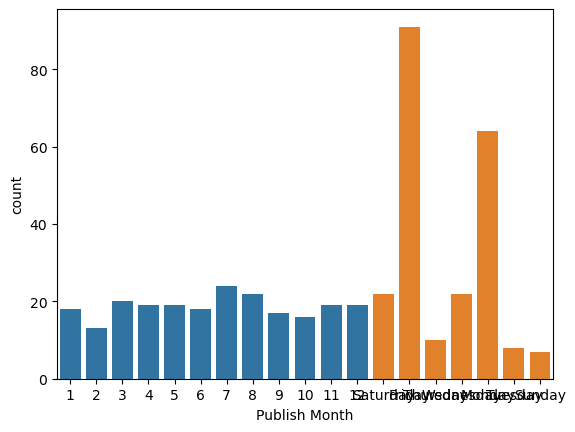

In [132]:
video_df['Publish Month'] = video_df['Video publish date'].dt.month
video_df['Publish Weekday'] = video_df['Video publish date'].dt.day_name()

sns.countplot(x='Publish Month', data=video_df)
sns.countplot(x='Publish Weekday', data=video_df)


### Categorical Analysis
### High vs Low Performing Videos: Use a threshold like views or revenue to create groups:

<Axes: xlabel='Performance', ylabel='Average view Duration'>

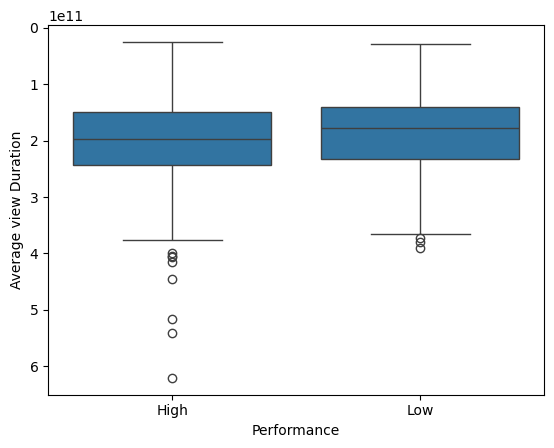

In [134]:
video_df['Performance'] = ['High' if x > video_df['Views'].median() else 'Low' for x in video_df['Views']]
sns.boxplot(x='Performance', y='Average view Duration', data=video_df)


### Outlier Analysis

<Axes: ylabel='Views'>

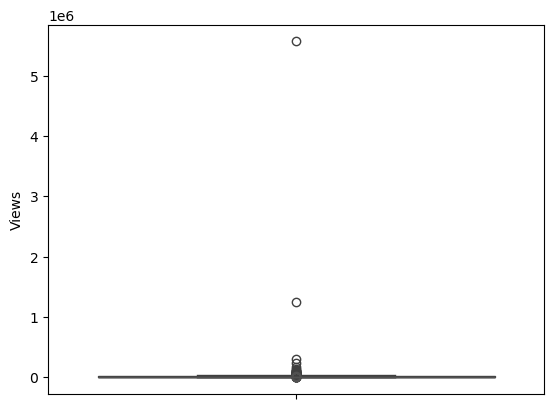

In [136]:
sns.boxplot(video_df['Views'])
sns.boxplot(video_df['Your Estmated Revenue (USD)'])

### Step 1.5: Save Processed Data (Optional)

In [138]:
video_df.to_csv("Processed_Video_Data.csv", index=False)

## PHASE 2: Regression — Predict Video Views

### Step 2.1: Select Features and Target

In [141]:
video_df.columns

Index(['Video', 'Video title', 'Video publish date', 'Comments', 'Shares',
       'DisLikes', 'Likes', 'Subscribers lost', 'Subscribers gained',
       'RPM (USD)', 'CPM (USD)', 'Average Percentage viewed(%)',
       'Average view Duration', 'Views', 'Subscribers',
       'Your Estmated Revenue (USD)', 'Impressions',
       'Impressionss click-through rate (%)', 'Watch time', 'Publish Month',
       'Publish Day', 'Publish Weekday', 'Is Weekend', 'Likes per View',
       'Dislikes per View', 'Comments per View', 'Shares per View',
       'Subscribers per View', 'Average view Duration (sec)',
       'Watch time (sec)', 'Performance'],
      dtype='object')

In [142]:
# Step 1:select target varable
target = 'Views'

# Step 2: Define feature columns with corrected names
features = [
    'Likes',
    'DisLikes',
    'Comments',
    'Shares',
    'Subscribers gained',
    'Subscribers lost',
    'Your Estmated Revenue (USD)',
    'Impressions',
    'Impressionss click-through rate (%)',
    'Average Percentage viewed(%)',
    'CPM (USD)',
    'RPM (USD)',
    'Average view Duration (sec)',
    'Watch time (sec)',
    'Subscribers'
]

# Step 3: Select features and target
X = video_df[features]
y = video_df[target]


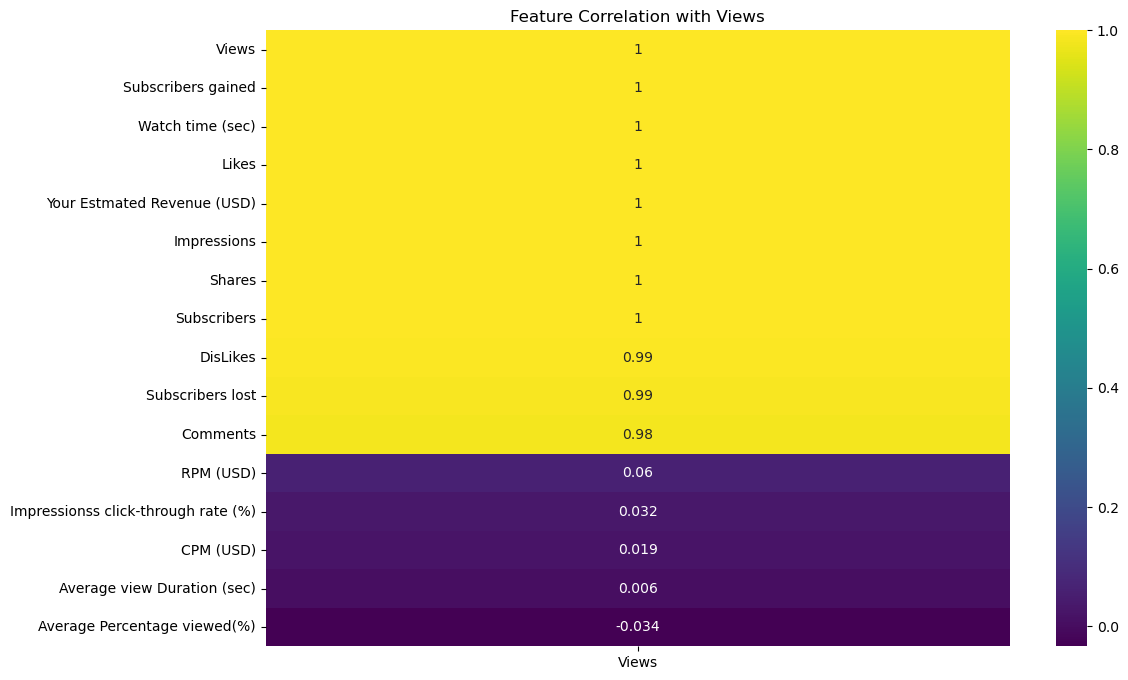

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = video_df[features + [target]].corr()

# Visualize
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[[target]].sort_values(by=target, ascending=False), annot=True, cmap='viridis')
plt.title('Feature Correlation with Views')
plt.show()


### Step 2.2: Train-Test Split

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 2.3: Train a Random Forest Model

In [147]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

RMSE: 3220.83
Mean Squared Error: 10373727.59
R-squared Score: 0.97


### Feature Importance (Random Forest)

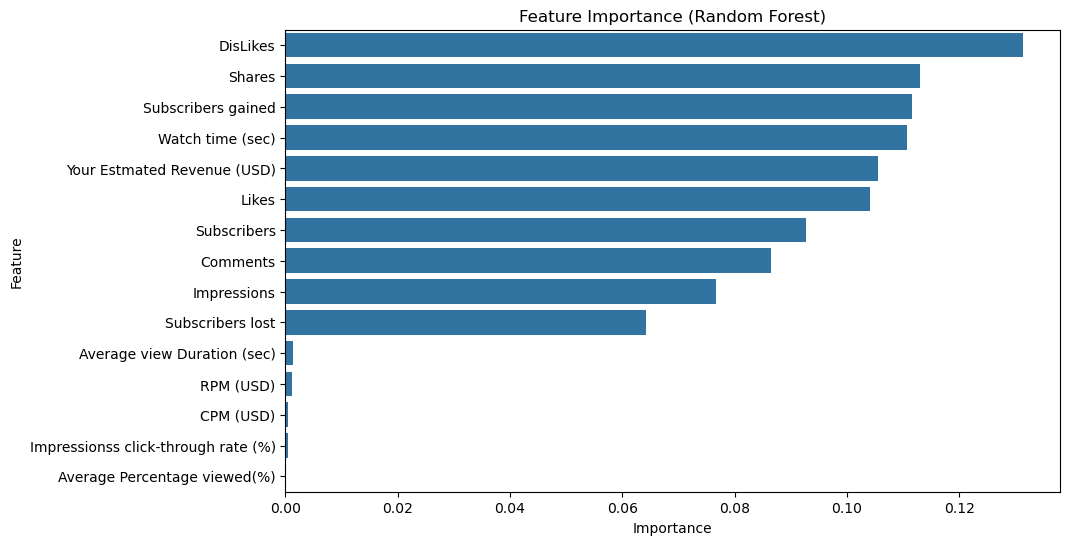

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

### Step 2.4: XGBoost Model for Comparison

In [151]:
!pip install xgboost

In [152]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")


XGBoost RMSE: 3438.94
Mean Squared Error: 10373727.59
XGBoost R² Score: 0.97


### Step 2.5: Feature Importance (XG Boost)

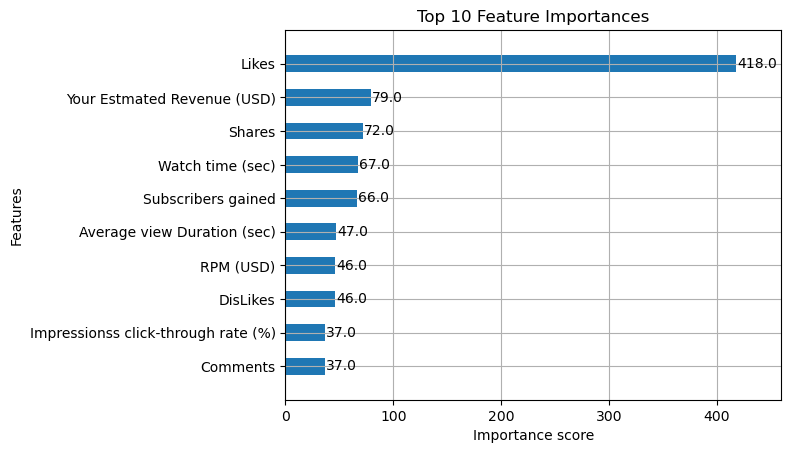

In [154]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model, max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances")
plt.show()


###  Residual Analysis
### Check for patterns in prediction errors:

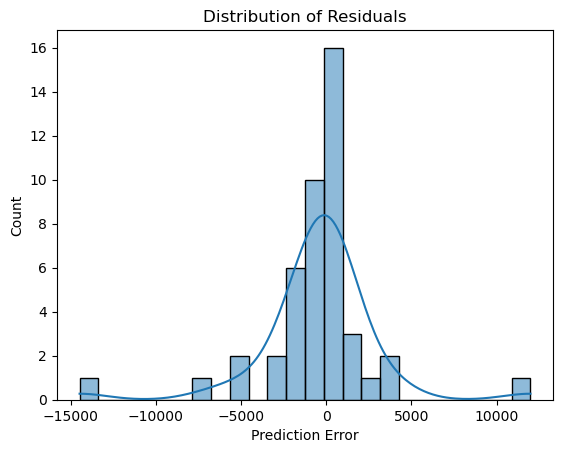

In [156]:
residuals = y_test - y_pred_xgb
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.show()

### Save the Best Model

In [158]:
import joblib
joblib.dump(xgb_model, 'xgboost_views_model.pkl')

['xgboost_views_model.pkl']

## PHASE 3: Audience Segmentation

### Step 3.1: Load and Inspect the Data

In [161]:
import pandas as pd

# Load dataset
country_df = pd.read_csv(r"C:\Users\ksvg7\Desktop\Capstone_Projects\YouTube Video Performance Predictor & Audience Insights System\Original YouTube data\Aggregated_Metrics_By_Country_And_Subscriber_Status.csv")

In [162]:
# Quick look
country_df.head()

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373


In [163]:
country_df.shape

(55292, 14)

In [164]:
country_df.columns

Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time'],
      dtype='object')

In [165]:
country_df.dtypes

Video Title                    object
External Video ID              object
Video Length                    int64
Thumbnail link                 object
Country Code                   object
Is Subscribed                    bool
Views                           int64
Video Likes Added               int64
Video Dislikes Added            int64
Video Likes Removed             int64
User Subscriptions Added        int64
User Subscriptions Removed      int64
Average View Percentage       float64
Average Watch Time            float64
dtype: object

In [166]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55292 entries, 0 to 55291
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Video Title                 55292 non-null  object 
 1   External Video ID           55292 non-null  object 
 2   Video Length                55292 non-null  int64  
 3   Thumbnail link              55292 non-null  object 
 4   Country Code                54906 non-null  object 
 5   Is Subscribed               55292 non-null  bool   
 6   Views                       55292 non-null  int64  
 7   Video Likes Added           55292 non-null  int64  
 8   Video Dislikes Added        55292 non-null  int64  
 9   Video Likes Removed         55292 non-null  int64  
 10  User Subscriptions Added    55292 non-null  int64  
 11  User Subscriptions Removed  55292 non-null  int64  
 12  Average View Percentage     53854 non-null  float64
 13  Average Watch Time          538

In [167]:
# Drop rows with missing Country Code or Watch Metrics
country_df = country_df.dropna(subset=['Country Code', 'Average View Percentage', 'Average Watch Time'])

# Convert 'Is Subscribed' from bool to int
country_df['Is Subscribed'] = country_df['Is Subscribed'].astype(int)

In [168]:
country_df.isnull().sum()

Video Title                   0
External Video ID             0
Video Length                  0
Thumbnail link                0
Country Code                  0
Is Subscribed                 0
Views                         0
Video Likes Added             0
Video Dislikes Added          0
Video Likes Removed           0
User Subscriptions Added      0
User Subscriptions Removed    0
Average View Percentage       0
Average Watch Time            0
dtype: int64

### Step 3.2: Group Data by Country & Subscriber Status

In [170]:
audience_df = country_df.groupby(['Country Code', 'Is Subscribed']).agg({
    'Views': 'sum',
    'Average Watch Time': 'mean',  # Replaces 'Watch time (hours)'
    'Average View Percentage': 'mean',  # Optional insight
    'User Subscriptions Added': 'sum'  # Replaces 'Subscribers'
}).reset_index()


### 3.3 Clustering (KMeans)
### Use KMeans for audience segmentation.

### Feature Scaling: Before clustering, normalize features.

In [173]:
print(audience_df.columns.tolist())

['Country Code', 'Is Subscribed', 'Views', 'Average Watch Time', 'Average View Percentage', 'User Subscriptions Added']


### Define Features for Clustering

In [175]:
from sklearn.preprocessing import StandardScaler

features = ['Views', 'Average View Percentage', 'Average Watch Time', 'User Subscriptions Added']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(audience_df[features])


### Scale the Data

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(audience_df[features])


### Apply K-Means Clustering

In [179]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

In [180]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
audience_df['Segment'] = kmeans.fit_predict(scaled_data)


### Analyze Clusters

In [182]:
cluster_summary = audience_df.groupby('Segment')[features].mean().round(2)
print(cluster_summary)

             Views  Average View Percentage  Average Watch Time  \
Segment                                                           
0           159.06                     0.11               58.60   
1          4999.10                     0.45              281.23   
2         15414.24                     0.32              179.41   
3        345239.50                     0.36              209.04   

         User Subscriptions Added  
Segment                            
0                            0.39  
1                          290.32  
2                          127.37  
3                        29205.50  


### Visualize Segments

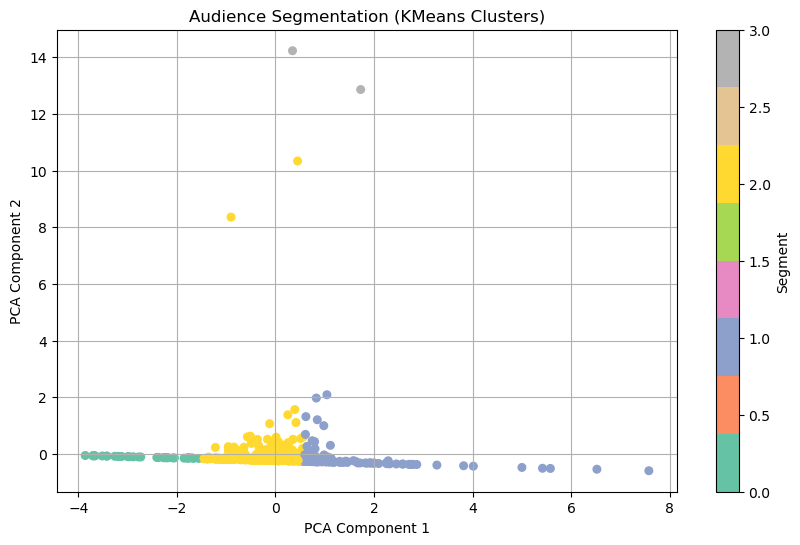

In [184]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=audience_df['Segment'], cmap='Set2', s=30)
plt.title('Audience Segmentation (KMeans Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Segment')
plt.grid(True)
plt.show()

In [185]:
# View segment-wise means
audience_df.groupby('Segment')[['Views', 'Average Watch Time', 'User Subscriptions Added']].mean()

,Views,Average Watch Time,User Subscriptions Added
Segment,,,
0,159.055556,58.595074,0.388889
1,4999.101562,281.230253,290.320312
2,15414.237226,179.413640,127.372263
3,345239.500000,209.044000,29205.500000


### Choose Optimal Clusters (K) with the Elbow Method
### This method helps us find the best number of segments (clusters) based on inertia (distortion).

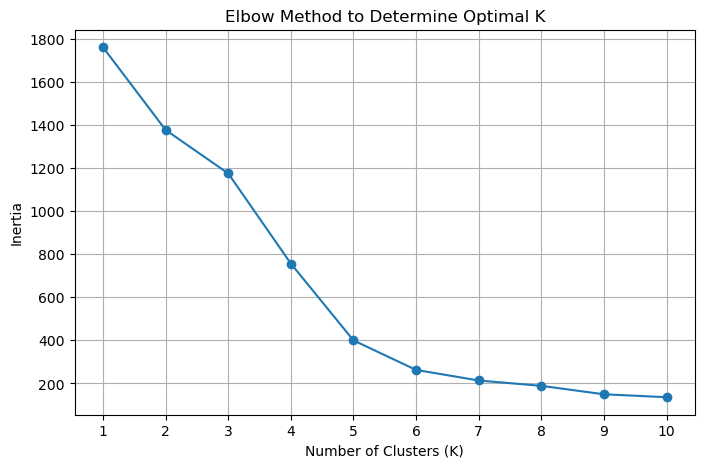

In [187]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()


### Name Segments Based on Engagement
### Once clustering is done, analyze cluster behavior like this:

In [189]:
audience_df['Segment'] = kmeans.labels_  # After final KMeans

segment_stats = audience_df.groupby('Segment')[features].mean().round(2)
print(segment_stats)


             Views  Average View Percentage  Average Watch Time  \
Segment                                                           
0            17.21                     0.08               48.12   
1          6050.10                     0.31              176.24   
2        345239.50                     0.36              209.04   
3        909740.50                     0.30              178.42   
4          6057.95                     0.42              247.69   
5             2.00                     1.04              494.08   
6            19.50                     0.58              597.51   
7          3942.11                     0.24              130.63   
8         14175.27                     0.36              210.36   
9           565.54                     0.51              346.54   

         User Subscriptions Added  
Segment                            
0                            0.43  
1                          140.74  
2                        29205.50  
3              

### Then assign segment names manually based on interpretation:

In [191]:
# Example (customize based on your stats)
segment_map = {
    0: 'Highly Engaged',
    1: 'Moderately Engaged',
    2: 'Low Engagement',
    3: 'New/One-time Viewers'
}

audience_df['Segment Label'] = audience_df['Segment'].map(segment_map)


### Group by Country & Segment Label

In [193]:
print(audience_df.columns.tolist())

['Country Code', 'Is Subscribed', 'Views', 'Average Watch Time', 'Average View Percentage', 'User Subscriptions Added', 'Segment', 'Segment Label']


In [194]:
country_seg = audience_df.groupby(['Country Code', 'Segment Label']).size().unstack().fillna(0)

# Optional: convert to int for cleaner output
country_seg = country_seg.astype(int)

# Sort by highest number of 'Highly Engaged' (or whatever label is most important)
if 'Highly Engaged' in country_seg.columns:
    country_seg = country_seg.sort_values(by='Highly Engaged', ascending=False)

# Show top 10
print(country_seg.head(10))


Segment Label  Highly Engaged  Low Engagement  Moderately Engaged  \
Country Code                                                        
YT                          2               0                   0   
AS                          2               0                   0   
PM                          1               0                   0   
DM                          1               0                   0   
MH                          1               0                   0   
FM                          1               0                   0   
GF                          1               0                   1   
GI                          1               0                   0   
GN                          1               0                   0   
GQ                          1               0                   0   

Segment Label  New/One-time Viewers  
Country Code                         
YT                                0  
AS                                0  
PM                 

### Visualize Country Segments (Top 10)

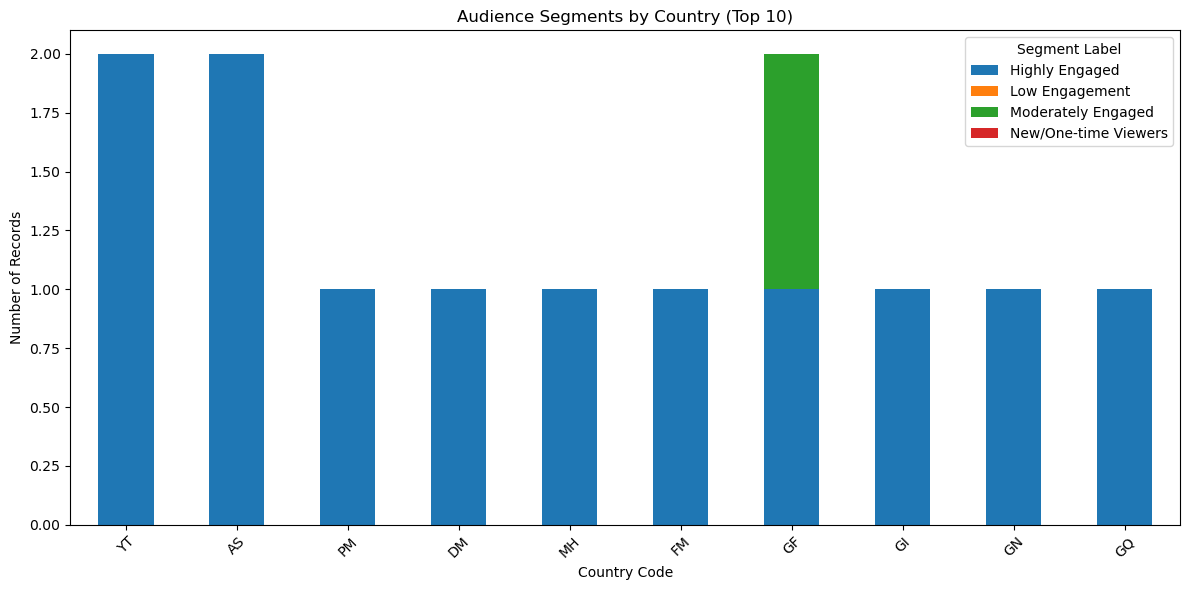

In [196]:
import matplotlib.pyplot as plt

# Plot top 10 countries
country_seg.head(10).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Audience Segments by Country (Top 10)')
plt.ylabel('Number of Records')
plt.xlabel('Country Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Segmentation by Subscription Status

Segment Label  Highly Engaged  Low Engagement  Moderately Engaged  \
Is Subscribed                                                       
0                          13               0                  80   
1                          15               2                  37   

Segment Label  New/One-time Viewers  
Is Subscribed                        
0                                 2  
1                                 0  


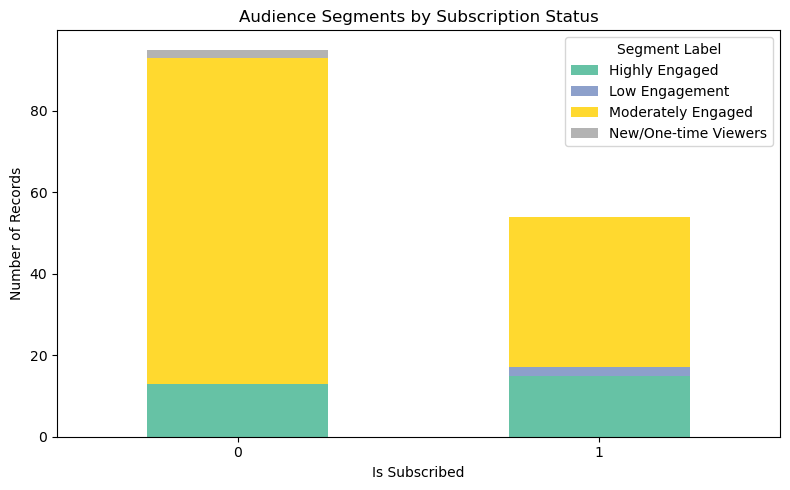

In [198]:
sub_status_seg = audience_df.groupby(['Is Subscribed', 'Segment Label']).size().unstack().fillna(0)
sub_status_seg = sub_status_seg.astype(int)
print(sub_status_seg)

# Plot
sub_status_seg.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title('Audience Segments by Subscription Status')
plt.ylabel('Number of Records')
plt.xlabel('Is Subscribed')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Step 3.3: Pivot Table for Comparative Analysis

In [200]:
# Create pivot for comparing subscribed vs non-subscribed
pivot_views = audience_df.pivot(index='Country Code', columns='Is Subscribed', values='Views')
pivot_views.columns = ['Non-Subscribed Views', 'Subscribed Views']
pivot_views.fillna(0, inplace=True)
pivot_views['Total Views'] = pivot_views['Subscribed Views'] + pivot_views['Non-Subscribed Views']

# Top 10 countries by total views
top_countries = pivot_views.sort_values('Total Views', ascending=False).head(10)
print(top_countries)


              Non-Subscribed Views  Subscribed Views  Total Views
Country Code                                                     
US                       1006835.0          347615.0    1354450.0
IN                        812646.0          342864.0    1155510.0
GB                        173126.0           66051.0     239177.0
CA                        154980.0           67393.0     222373.0
DE                        129852.0           42313.0     172165.0
AU                         82688.0           33607.0     116295.0
BR                         78708.0           35453.0     114161.0
ID                         79785.0           32715.0     112500.0
FR                         56083.0           22769.0      78852.0
SG                         54791.0           21003.0      75794.0


### Step 3.4: Visualize Audience Insights

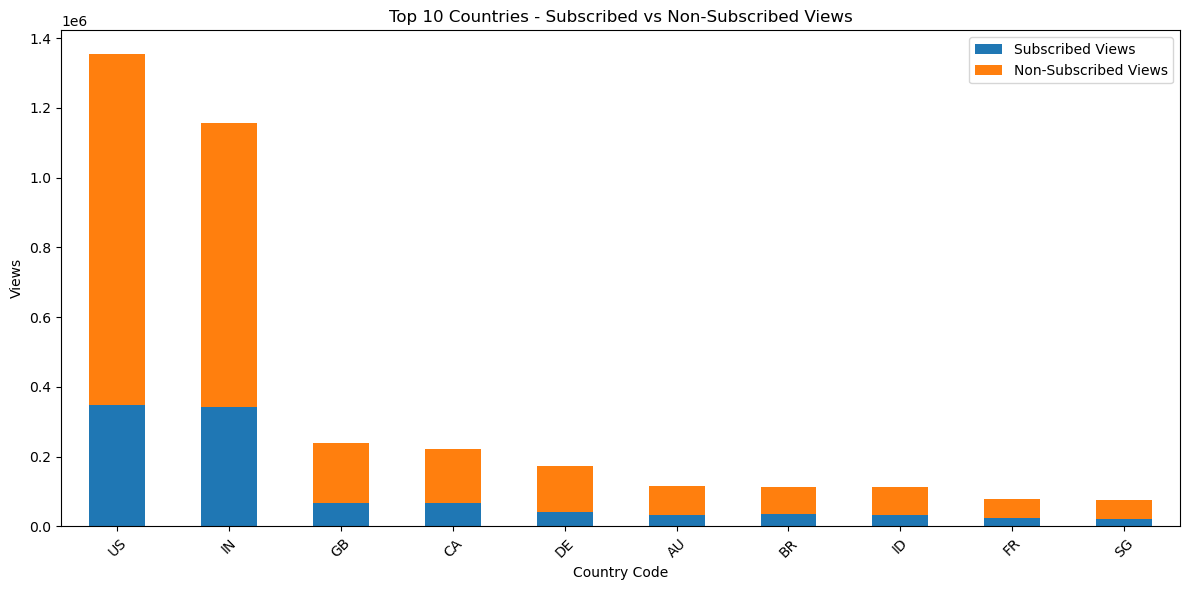

In [202]:
import matplotlib.pyplot as plt

# Bar plot: Subscribed vs Non-Subscribed in top countries
top_countries[['Subscribed Views', 'Non-Subscribed Views']].plot(
    kind='bar', stacked=True, figsize=(12, 6)
)
plt.title("Top 10 Countries - Subscribed vs Non-Subscribed Views")
plt.ylabel("Views")
plt.xlabel("Country Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## PHASE 4: Comment Sentiment Analysis

### Step 4.1: Load and Explore Comments

In [205]:
# Load data
comments_df = pd.read_csv(r"C:\Users\ksvg7\Desktop\Capstone_Projects\YouTube Video Performance Predictor & Audience Insights System\Original YouTube data\All_Comments_Final.csv")

In [206]:
# Check structure
comments_df.head()

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21T20:24:20Z,sHRq-LshG3U,user_2816


In [207]:
comments_df.shape

(10240, 7)

In [208]:
comments_df.columns

Index(['Comments', 'Comment_ID', 'Reply_Count', 'Like_Count', 'Date', 'VidId',
       'user_ID'],
      dtype='object')

In [209]:
comments_df.dtypes

Comments       object
Comment_ID     object
Reply_Count     int64
Like_Count      int64
Date           object
VidId          object
user_ID        object
dtype: object

### Step 4.2: Preprocess Comments

In [211]:
# Ensure 'Comments' column is string type
comments_df['Comments'] = comments_df['Comments'].astype(str)

# Remove null or empty string comments (optional cleanup)
comments_df = comments_df[comments_df['Comments'].str.strip().astype(bool)]


### Step 4.3: Apply Sentiment Analysis with TextBlob

In [213]:
!pip install textblob

In [214]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksvg7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Sentiment Analysis with TextBlob

In [216]:
from textblob import TextBlob

# Define a function to classify sentiment
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function
comments_df['Sentiment'] = comments_df['Comments'].apply(get_sentiment)


### View Sentiment Distribution


In [218]:
print(comments_df['Sentiment'].value_counts())


Sentiment
Positive    6988
Neutral     2636
Negative     616
Name: count, dtype: int64


### Step 4.4: Visualize Sentiment Distribution

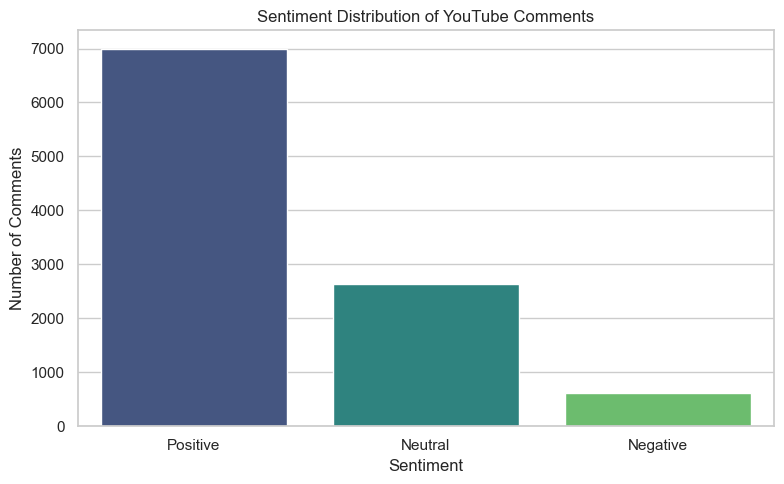

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot sentiment distribution without the FutureWarning
plt.figure(figsize=(8, 5))
sns.countplot(data=comments_df, x='Sentiment', hue='Sentiment', order=['Positive', 'Neutral', 'Negative'], palette='viridis', legend=False)
plt.title('Sentiment Distribution of YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.show()


### Pie Chart of Sentiment Proportions

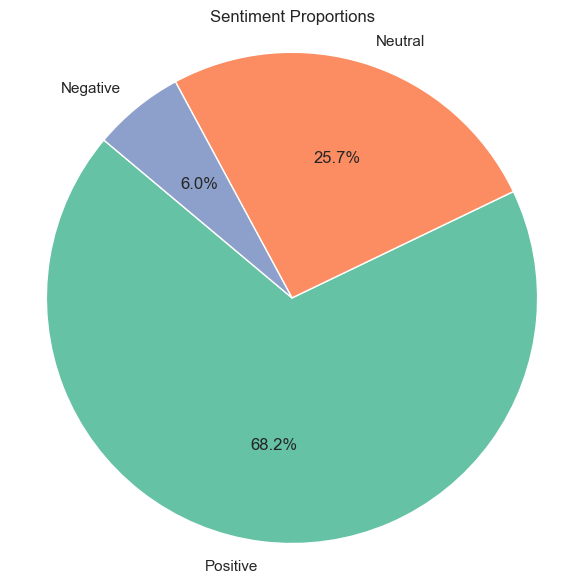

In [222]:
# Pie chart of sentiment proportions
sentiment_counts = comments_df['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
colors = ['#66c2a5','#fc8d62','#8da0cb']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Proportions')
plt.axis('equal')
plt.tight_layout()
plt.show()


### Sentiment Trend Over Time

In [224]:
comments_df['Date'] = pd.to_datetime(comments_df['Date'])
comments_df['DateOnly'] = comments_df['Date'].dt.date

<Figure size 1200x600 with 0 Axes>

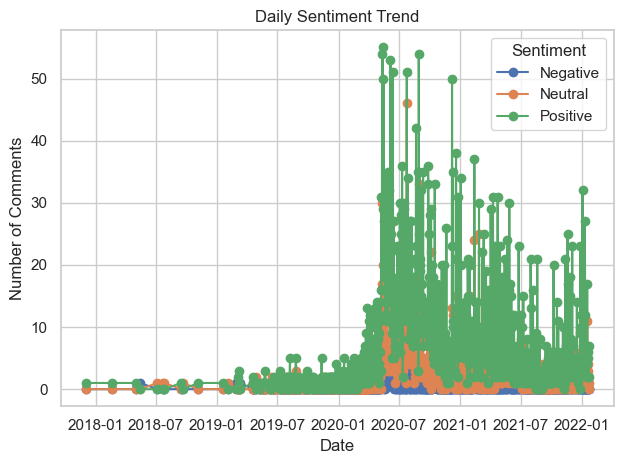

In [225]:
# Sentiment trend over time
trend = comments_df.groupby(['DateOnly', 'Sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
trend.plot(kind='line', marker='o')
plt.title('Daily Sentiment Trend')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 4.5: Save for Power BI Dashboard

In [227]:
comments_df.to_csv('Processed_Comments_Sentiment.csv', index=False)


## PHASE 5: Time-Based Performance Analysis

### Step 5.1: Load and Inspect the Data

In [230]:
import pandas as pd

# Load dataset
time_df = pd.read_csv(r"C:\Users\ksvg7\Desktop\Capstone_Projects\YouTube Video Performance Predictor & Audience Insights System\Original YouTube data\Video_Performance_Over_Time.csv")

In [231]:
time_df.head()

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.126049,338.567500,0
3,19 Jan 2022,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,https://i.ytimg.com/vi/3TrAYmrmA8o/hqdefault.jpg,1,0,0,0,0,0,0.011508,11.278000,0
4,19 Jan 2022,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,https://i.ytimg.com/vi/Xgg7dIKys9E/hqdefault.jpg,1,0,0,0,0,0,0.007541,21.900000,0


In [232]:
time_df.shape

(111857, 14)

In [233]:
# Check structure
time_df.columns

Index(['Date', 'Video Title', 'External Video ID', 'Video Length',
       'Thumbnail link', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Subscriptions Added',
       'User Subscriptions Removed', 'Average View Percentage',
       'Average Watch Time', 'User Comments Added'],
      dtype='object')

In [234]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111857 entries, 0 to 111856
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        111857 non-null  object 
 1   Video Title                 111857 non-null  object 
 2   External Video ID           111857 non-null  object 
 3   Video Length                111857 non-null  int64  
 4   Thumbnail link              111857 non-null  object 
 5   Views                       111857 non-null  int64  
 6   Video Likes Added           111857 non-null  int64  
 7   Video Dislikes Added        111857 non-null  int64  
 8   Video Likes Removed         111857 non-null  int64  
 9   User Subscriptions Added    111857 non-null  int64  
 10  User Subscriptions Removed  111857 non-null  int64  
 11  Average View Percentage     110510 non-null  float64
 12  Average Watch Time          110510 non-null  float64
 13  User Comments 

In [235]:
time_df.isnull().sum()

Date                             0
Video Title                      0
External Video ID                0
Video Length                     0
Thumbnail link                   0
Views                            0
Video Likes Added                0
Video Dislikes Added             0
Video Likes Removed              0
User Subscriptions Added         0
User Subscriptions Removed       0
Average View Percentage       1347
Average Watch Time            1347
User Comments Added              0
dtype: int64

### Fill with Grouped Averages

In [237]:
df_grouped = time_df.copy()

# Fill NaNs with the average per video
df_grouped['Average View Percentage'] = df_grouped.groupby('Video Title')['Average View Percentage']\
                                                  .transform(lambda x: x.fillna(x.mean()))

df_grouped['Average Watch Time'] = df_grouped.groupby('Video Title')['Average Watch Time']\
                                            .transform(lambda x: x.fillna(x.mean()))


In [238]:
df_grouped.isnull().sum()

Date                          0
Video Title                   0
External Video ID             0
Video Length                  0
Thumbnail link                0
Views                         0
Video Likes Added             0
Video Dislikes Added          0
Video Likes Removed           0
User Subscriptions Added      0
User Subscriptions Removed    0
Average View Percentage       0
Average Watch Time            0
User Comments Added           0
dtype: int64

### Step 5.2: Parse Date and Extract Features

In [240]:
# Convert 'Date' column to datetime format
df_grouped['Date'] = pd.to_datetime(df_grouped['Date'], errors='coerce')

# Drop rows where 'Date' could not be converted (optional cleanup)
df_grouped = df_grouped.dropna(subset=['Date'])

# Extract time-based features
df_grouped['Year'] = df_grouped['Date'].dt.year
df_grouped['Month'] = df_grouped['Date'].dt.month
df_grouped['Weekday'] =df_grouped['Date'].dt.day_name()
df_grouped['Day'] = df_grouped['Date'].dt.day
df_grouped['Week'] = df_grouped['Date'].dt.isocalendar().week


In [241]:
df_grouped.isnull().sum()

Date                          0
Video Title                   0
External Video ID             0
Video Length                  0
Thumbnail link                0
Views                         0
Video Likes Added             0
Video Dislikes Added          0
Video Likes Removed           0
User Subscriptions Added      0
User Subscriptions Removed    0
Average View Percentage       0
Average Watch Time            0
User Comments Added           0
Year                          0
Month                         0
Weekday                       0
Day                           0
Week                          0
dtype: int64

In [242]:
df_grouped['Weekday'].unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

### Step 5.3: Aggregate Views Over Time

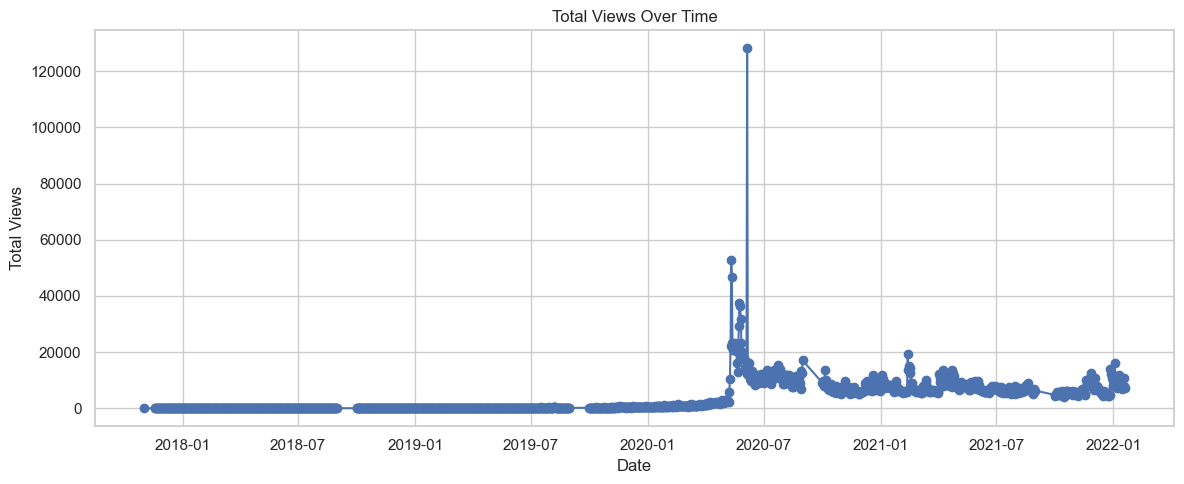

In [244]:
# Total views per day
daily_views = df_grouped.groupby('Date')['Views'].sum().reset_index()

# Plot views over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_views['Date'], daily_views['Views'], marker='o', linestyle='-')
plt.title("Total Views Over Time")
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 5.4: Seasonal Patterns

### Monthly Views

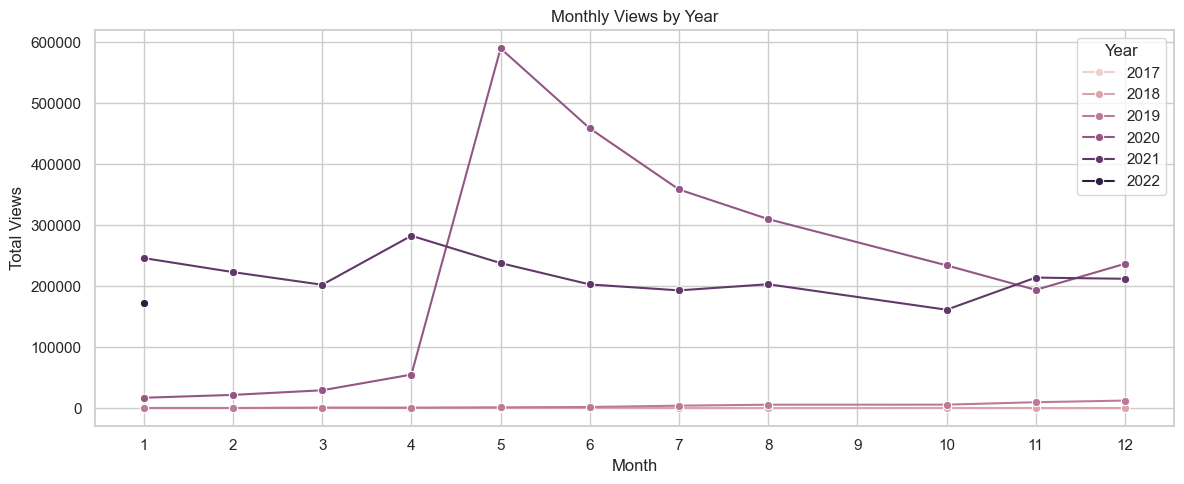

In [247]:
import seaborn as sns
monthly_views = df_grouped.groupby(['Year', 'Month'])['Views'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_views, x='Month', y='Views', hue='Year', marker="o")
plt.title("Monthly Views by Year")
plt.xlabel("Month")
plt.ylabel("Total Views")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


### Weekday-wise Average Views

In [249]:
# Example assuming your DataFrame is named df and has a 'Week' and 'Views' column
weekly_avg = df_grouped.groupby('Weekday')['Views'].mean()

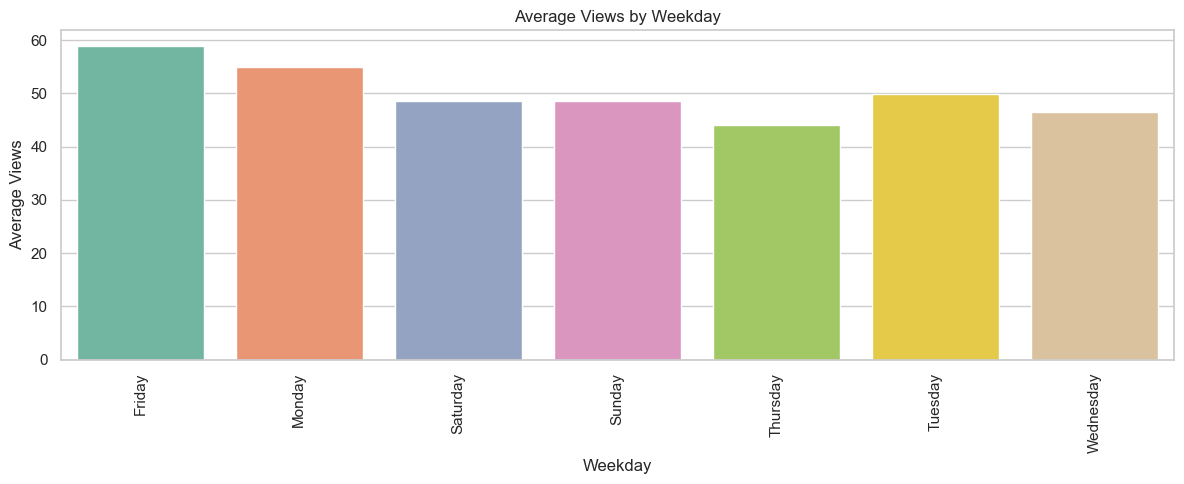

In [250]:
plt.figure(figsize=(12, 5))
sns.barplot(x=weekly_avg.index, y=weekly_avg.values, hue=weekly_avg.index, 
            palette='Set2', legend=False)
plt.title("Average Views by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Views")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Weekly Views Trend (by ISO Week Number)

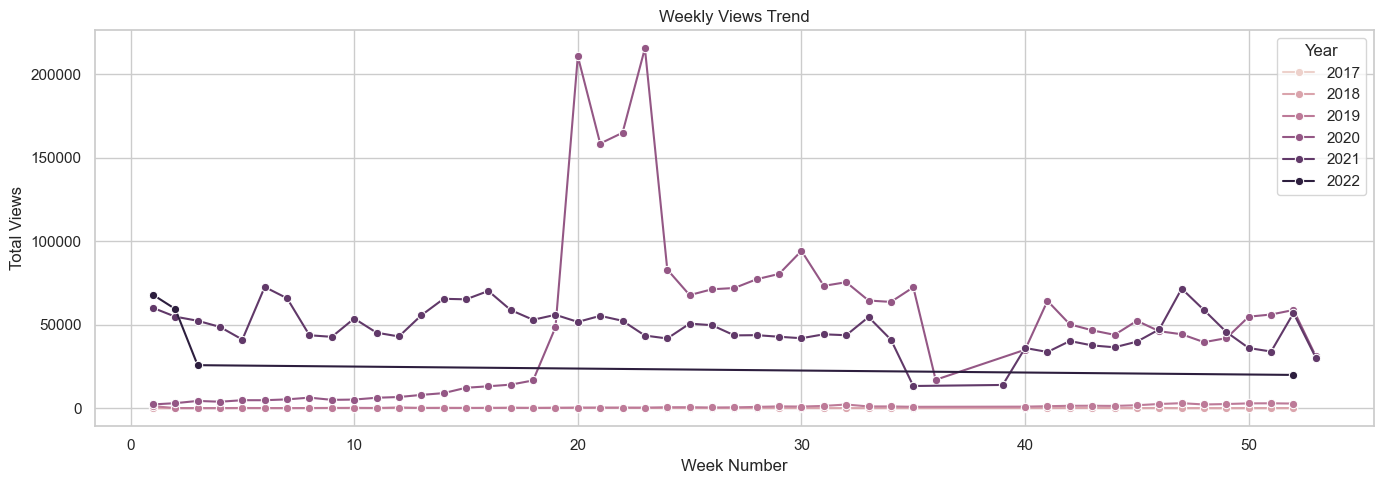

In [252]:
weekly_views = df_grouped.groupby(['Year', 'Week'])['Views'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=weekly_views, x='Week', y='Views', hue='Year', marker="o")
plt.title("Weekly Views Trend")
plt.xlabel("Week Number")
plt.ylabel("Total Views")
plt.tight_layout()
plt.show()


### Daily Views Trend (over all days)

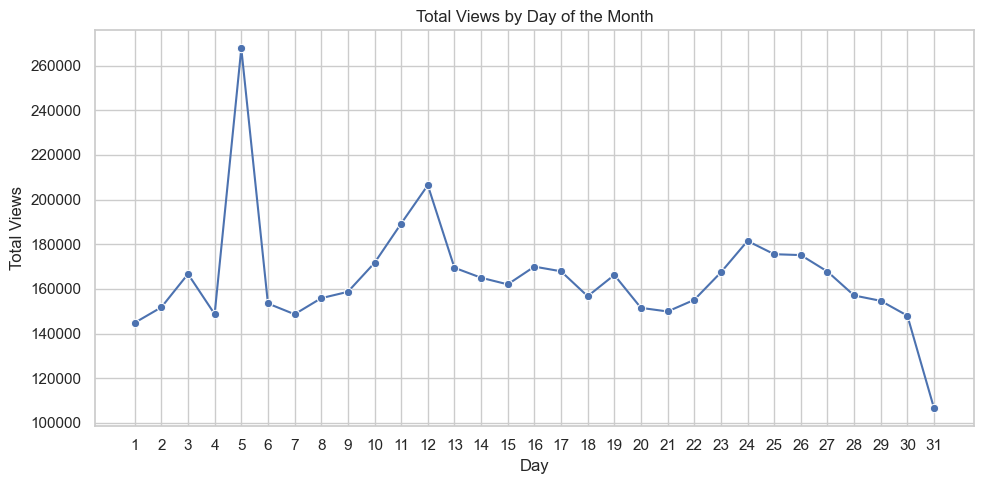

In [254]:
daily_views = df_grouped.groupby(['Day'])['Views'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_views, x='Day', y='Views', marker="o")
plt.title("Total Views by Day of the Month")
plt.xlabel("Day")
plt.ylabel("Total Views")
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()


### Step 5.5: Save Aggregated Data for Power BI (Optional)

In [256]:
# List of columns to keep
columns_to_save = [
    'Date','Views', 'Average Watch Time', 'Year', 'Month', 'Weekday', 'Day', 'Week'
]

# Filter the DataFrame
df_selected = df_grouped[columns_to_save]

# Save to new CSV file
df_selected.to_csv("Daily_Views_Over_Time.csv", index=False)
